In this notebook I am going to create clusters of customers in order to unerstand their preferences in greater detail. I have taken Marketing campaign dataset from kaggle.

Let's start with importing relevant libraries.

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
data= pd.read_csv("Marketing_campaign.csv", sep= "\t")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

We have 2240 observations. This comprises of 29 features.

Before starting data analysis journey let's check data dictionary first. This will give a overview of coulumns present in our dataset. 
Important features to understand here are:

Recency- it represent the no of days after customer's last purchase 

Mnt- this word speaks about amount spent on items

Num- this dipicts numbers of purchase

Accepted Cmp- gives no of coupons taken by the customers

Details over Zcost and ZRevenue columns are not provided in data dictionary.

Let's first of all see what all features contain categorical variables.

In [4]:
categorical_cols= [x for x in data.dtypes.index if data.dtypes[x]=='object']
categorical_cols

['Education', 'Marital_Status', 'Dt_Customer']

In [5]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer']) # this column contains date as data. So it must be in date-time format.

In [6]:
data.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [7]:
data.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In Marital_Status column there is possibility to group categories and hence organise it to get more meningful insight.

Hence let's provide numbers to categories.

Also in education column we need to convert categories in numbers.

We can use LabelEncoder or one-hot encoding also.

In [8]:
mapping_marital_status = {'Single' : 0, 'Together': 1, 'Married': 1, 'Divorced': 0, 'Widow': 0, 'Alone': 0,
       'Absurd': 0, 'YOLO': 0}
mapping_education= {'Graduation': 1, 'PhD': 2, 'Master': 2, 'Basic': 0, '2n Cycle': 2}
data=data.replace({'Marital_Status': mapping_marital_status, 'Education': mapping_education}) 


In [9]:
data.isnull().sum().sort_values(ascending=False)/data.shape[0]*100  # checking missing values

Income                 1.071429
Response               0.000000
MntSweetProducts       0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntGoldProds           0.000000
Z_Revenue              0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
ID                     0.000000
dtype: float64

We have very less %age of data missing. Hence we can drop these observations easily.

In [10]:
data=data.dropna()

In [11]:
data.Income.isnull().sum()

0

In [12]:
data['Income']= data.Income.round(0).astype('int')  # changing dtype of Income feature from float to integer

In this dataset we have few columns simmilar to others. We can group them together. This will reduce features and may provide better visualizations. 

We will apply some feature engineering techniques also on this dataset.

In [13]:
data['Kidhome'].unique()

array([0, 1, 2], dtype=int64)

In [14]:
data.Teenhome.unique()

array([0, 1, 2], dtype=int64)

In [15]:
data['kid_teen'] = data['Kidhome'] + data['Teenhome']
data['kid_teen']= np.where(data['kid_teen'] > 0, 1, 0)
data.kid_teen

0       0
1       1
2       0
3       1
4       1
       ..
2235    1
2236    1
2237    0
2238    1
2239    1
Name: kid_teen, Length: 2216, dtype: int32

In [16]:
data.Response.value_counts()

0    1883
1     333
Name: Response, dtype: int64

In [17]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'kid_teen'],
      dtype='object')

In [18]:
data['current_year'] = 2021
data['age'] = data['current_year']-data['Year_Birth']

In [19]:
data['current_date'] = '01-01-2015'
data['current_date'] = pd.to_datetime(data.current_date)
data['days_customer'] = (data['current_date']-data['Dt_Customer']).dt.days

In [20]:
data['luxurious_item'] = data['MntWines']+ data['MntSweetProducts']+ data['MntGoldProds']
data['food'] = data['MntFishProducts'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntSweetProducts']


In [21]:
data['accepted_cmp']= data['AcceptedCmp1']+data['AcceptedCmp2']+data['AcceptedCmp3']+data['AcceptedCmp4']+data['AcceptedCmp5']+data['Response']
data['accepted_cmp']= np.where(data['accepted_cmp'] > 0, 1, 0)

Now as we have done basic cleaning and preparation for this dataset, we will select the required features only and drop unnecesary features.

In [22]:
new_data= data[["age","days_customer","Education","Marital_Status","Income", "Recency","luxurious_item","food",
               "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases","NumWebVisitsMonth","accepted_cmp","Complain", "kid_teen"]]

In [23]:
new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2216.0,52.179603,11.985554,25.0,44.0,51.0,62.0,128.0
days_customer,2216.0,538.006318,232.469034,26.0,366.0,539.0,712.0,1089.0
Education,2216.0,1.447653,0.544178,0.0,1.0,1.0,2.0,2.0
Marital_Status,2216.0,0.645307,0.478528,0.0,0.0,1.0,1.0,1.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.0,666666.0
Recency,2216.0,49.012635,28.948352,0.0,24.0,49.0,74.0,99.0
luxurious_item,2216.0,376.085740,379.773555,3.0,41.0,246.0,617.0,1689.0
food,2216.0,258.018502,312.051990,1.0,29.0,101.0,419.0,1728.0
NumDealsPurchases,2216.0,2.323556,1.923716,0.0,1.0,2.0,3.0,15.0
NumWebPurchases,2216.0,4.085289,2.740951,0.0,2.0,4.0,6.0,27.0


You can see that all our selected features are measured on different scales. We must normalize them and make them comparable on same scale. Therefore we will use StandardScaler from sklearn libraries.

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [25]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_data)
scaled_data

array([[ 0.98644293,  1.97487499, -0.82280851, ...,  1.63181185,
        -0.09781206, -1.5813886 ],
       [ 1.23680074, -1.66514078, -0.82280851, ..., -0.61281575,
        -0.09781206,  0.63235564],
       [ 0.31882209, -0.17213195, -0.82280851, ..., -0.61281575,
        -0.09781206, -1.5813886 ],
       ...,
       [-1.01641959, -0.84764315, -0.82280851, ...,  1.63181185,
        -0.09781206, -1.5813886 ],
       [ 1.06989553, -0.84334053,  1.01523954, ..., -0.61281575,
        -0.09781206,  0.63235564],
       [ 1.23680074,  1.16167998,  1.01523954, ...,  1.63181185,
        -0.09781206,  0.63235564]])

 I am using PCA (Principal Component Analysis) before applying K-Means algorithm. This will reduce the noise in data and improve the result.

In [26]:
pca = PCA()
pca.fit(scaled_data)

PCA()

In [27]:
pca.explained_variance_ratio_
pca.explained_variance_ratio_.cumsum()

array([0.27735376, 0.39735572, 0.47862763, 0.55172769, 0.61982244,
       0.6855449 , 0.74550061, 0.80019129, 0.8525569 , 0.89208212,
       0.92565189, 0.949557  , 0.96925908, 0.98583431, 1.        ])

In [28]:
pca6 = PCA(n_components=6)

In [29]:
pca6.fit(scaled_data)

PCA(n_components=6)

In [30]:
pca6.transform(scaled_data)
score_pca6 = pca6.transform(scaled_data)

In [31]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans_pca.fit(score_pca6)
    wcss.append(kmeans_pca.inertia_)

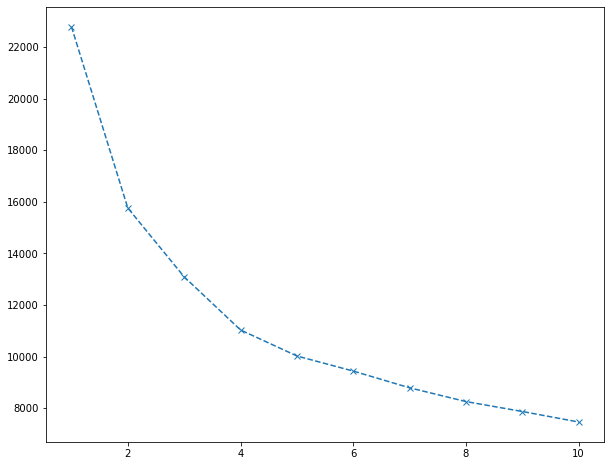

In [32]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss, marker='x', linestyle='--')

In [33]:
kmeans_pca = KMeans(n_clusters= 3, init='k-means++', random_state= 20)

In [34]:
kmeans_pca.fit_transform(score_pca6)

array([[6.26119919, 3.53738732, 4.2825826 ],
       [1.88071736, 4.9033622 , 3.75119763],
       [3.15933467, 1.94633368, 2.53518266],
       ...,
       [3.83061691, 2.7804378 , 3.85658119],
       [3.78909616, 3.32307399, 2.85472567],
       [2.38784008, 4.50091409, 1.71109233]])

In [35]:
pd.DataFrame(score_pca6)

,0,1,2,3,4,5
0,3.541536,1.961757,-1.968234,-0.051122,1.195273,-0.811275
1,-1.550071,-1.375659,1.026455,-0.398256,1.009633,-0.780669
2,1.325367,-0.526341,-0.058772,0.106268,-0.607976,0.818001
3,-2.261312,-1.433305,-0.111732,-0.444649,-1.076080,0.693998
4,-0.463978,0.535835,0.954408,1.270856,-0.948462,-0.541153
...,...,...,...,...,...,...
2211,1.254540,1.182169,0.080045,0.701335,-0.801400,0.393908
2212,0.030364,2.276340,2.749683,-0.745876,-0.084095,-0.071293
2213,1.298758,-1.110706,-1.742154,-0.215342,0.812558,-1.426871
2214,1.148702,-0.011276,2.130857,-0.631322,-0.522525,0.917860


In [36]:
scaled_data_pca_kmeans = pd.concat([new_data.reset_index(drop=True), \
    pd.DataFrame(score_pca6)], axis=1)
scaled_data_pca_kmeans.columns.values[-6:] = ['pc1', 'pc2','pc3', 'pc4','pc5','pc6']

scaled_data_pca_kmeans['cluster'] = kmeans_pca.labels_

Created clusters within the data

In [37]:
scaled_data_pca_kmeans.head()

,age,days_customer,Education,Marital_Status,Income,Recency,luxurious_item,food,NumDealsPurchases,NumWebPurchases,...,accepted_cmp,Complain,kid_teen,pc1,pc2,pc3,pc4,pc5,pc6,cluster
0,64,997,1,0,58138,58,811,894,3,8,...,1,0,0,3.541536,1.961757,-1.968234,-0.051122,1.195273,-0.811275,1
1,67,151,1,0,46344,38,18,10,2,1,...,0,0,1,-1.550071,-1.375659,1.026455,-0.398256,1.009633,-0.780669,0
2,56,498,1,1,71613,26,489,308,1,8,...,0,0,0,1.325367,-0.526341,-0.058772,0.106268,-0.607976,0.818001,1
3,37,91,1,1,26646,26,19,37,2,2,...,0,0,1,-2.261312,-1.433305,-0.111732,-0.444649,-1.076080,0.693998,0
4,40,347,2,1,58293,94,215,234,5,5,...,0,0,1,-0.463978,0.535835,0.954408,1.270856,-0.948462,-0.541153,2


In [38]:
scaled_data_pca_kmeans['cluster'] = scaled_data_pca_kmeans['cluster'].map({0:'First', 1:'Second', 2:'Third'})
scaled_data_pca_kmeans.head()

,age,days_customer,Education,Marital_Status,Income,Recency,luxurious_item,food,NumDealsPurchases,NumWebPurchases,...,accepted_cmp,Complain,kid_teen,pc1,pc2,pc3,pc4,pc5,pc6,cluster
0,64,997,1,0,58138,58,811,894,3,8,...,1,0,0,3.541536,1.961757,-1.968234,-0.051122,1.195273,-0.811275,Second
1,67,151,1,0,46344,38,18,10,2,1,...,0,0,1,-1.550071,-1.375659,1.026455,-0.398256,1.009633,-0.780669,First
2,56,498,1,1,71613,26,489,308,1,8,...,0,0,0,1.325367,-0.526341,-0.058772,0.106268,-0.607976,0.818001,Second
3,37,91,1,1,26646,26,19,37,2,2,...,0,0,1,-2.261312,-1.433305,-0.111732,-0.444649,-1.076080,0.693998,First
4,40,347,2,1,58293,94,215,234,5,5,...,0,0,1,-0.463978,0.535835,0.954408,1.270856,-0.948462,-0.541153,Third


<AxesSubplot:xlabel='pc2', ylabel='pc1'>

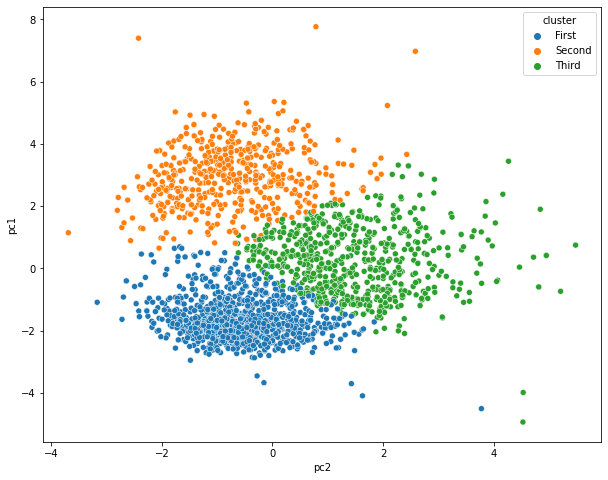

In [39]:
plt.figure(figsize = (10,8))
sns.scatterplot(x='pc2', y='pc1', data=scaled_data_pca_kmeans, hue='cluster', hue_order=['First', 'Second','Third'])

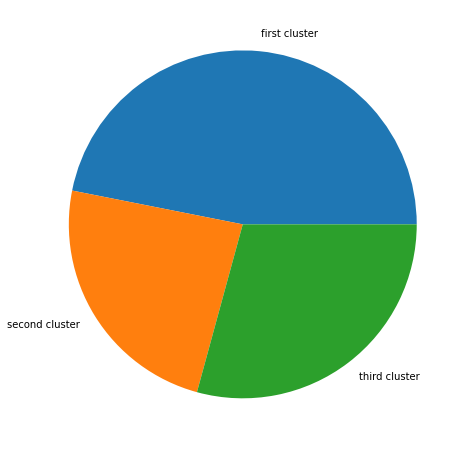

In [40]:
plt.figure(figsize = (8,8))
pie = scaled_data_pca_kmeans.groupby(['cluster']).size().to_frame().reset_index()
pie.rename(columns={0: 'count'}, inplace=True)

pie_labels = ['first cluster', 'second cluster', 'third cluster']
plt.pie(pie['count'], labels=pie_labels)
plt.show()

This pie chart clearly depicts that first cluster comprises almost half of the observation points. and other two has approximately equal proportions.

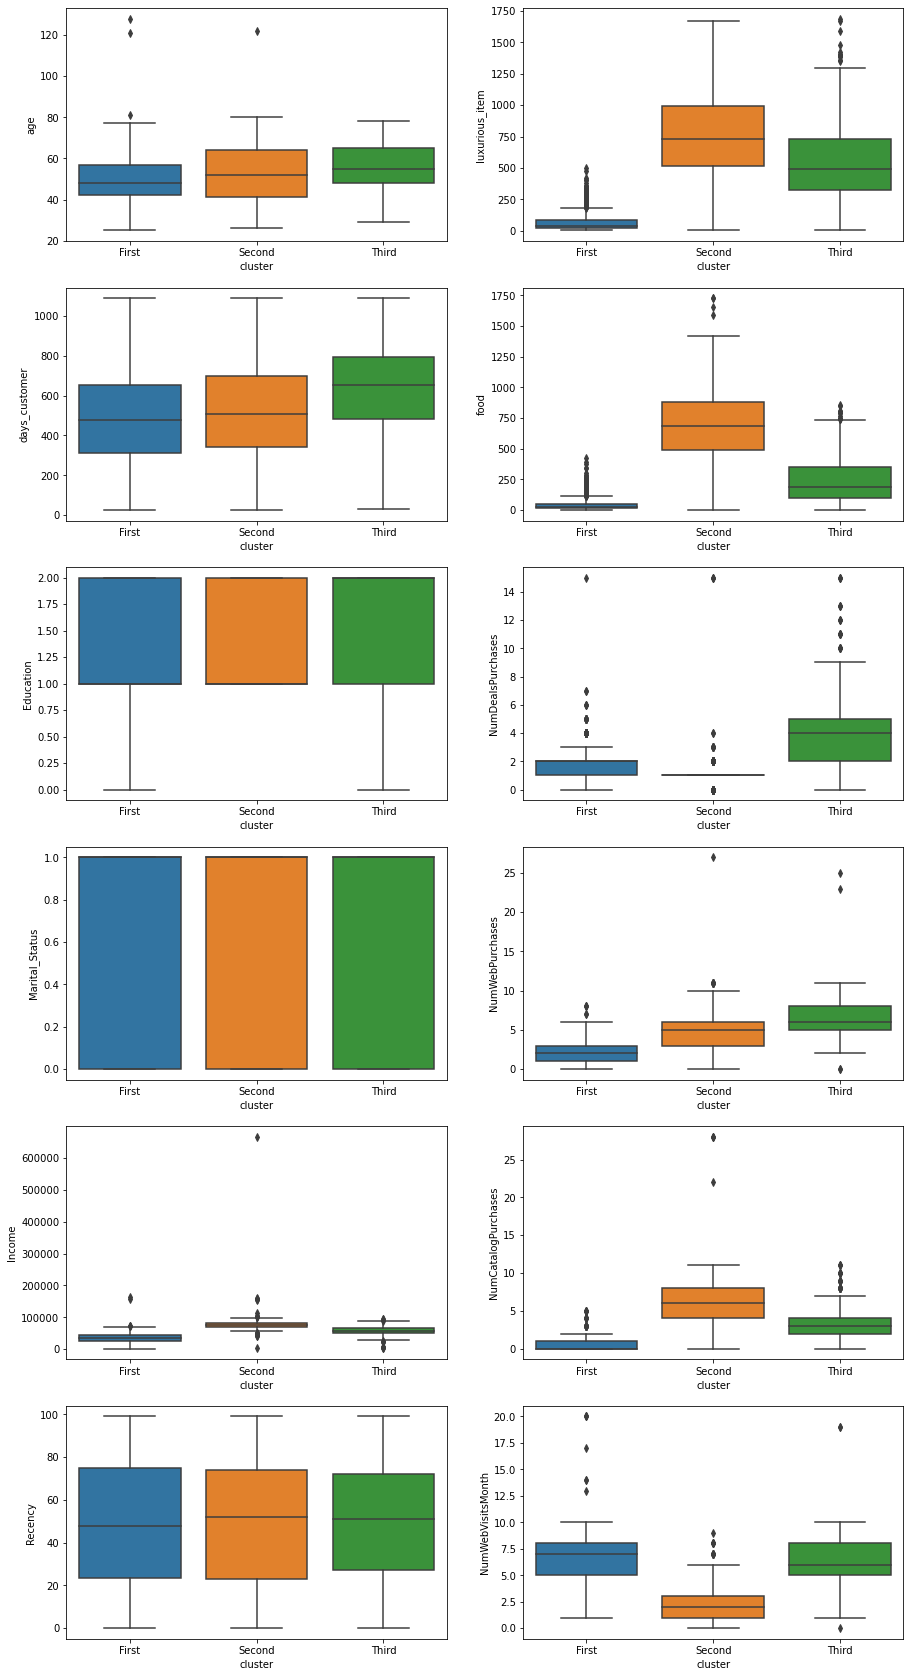

In [41]:
fig, axs = plt.subplots(ncols=2, nrows=6, figsize=(15,30))
for cols, x in zip(scaled_data_pca_kmeans.columns[:6], range(6)):
    for y in range(1):
        sns.boxplot(y=cols, x='cluster', data=scaled_data_pca_kmeans, order=['First', 'Second','Third'], ax=axs[x,y], showfliers = True )

for cols, x in zip(scaled_data_pca_kmeans.columns[6:], range(6)):
    for y in range(1,2):
        sns.boxplot(y=cols, x='cluster', data=scaled_data_pca_kmeans, order=['First', 'Second','Third'], ax=axs[x,y], showfliers = True )

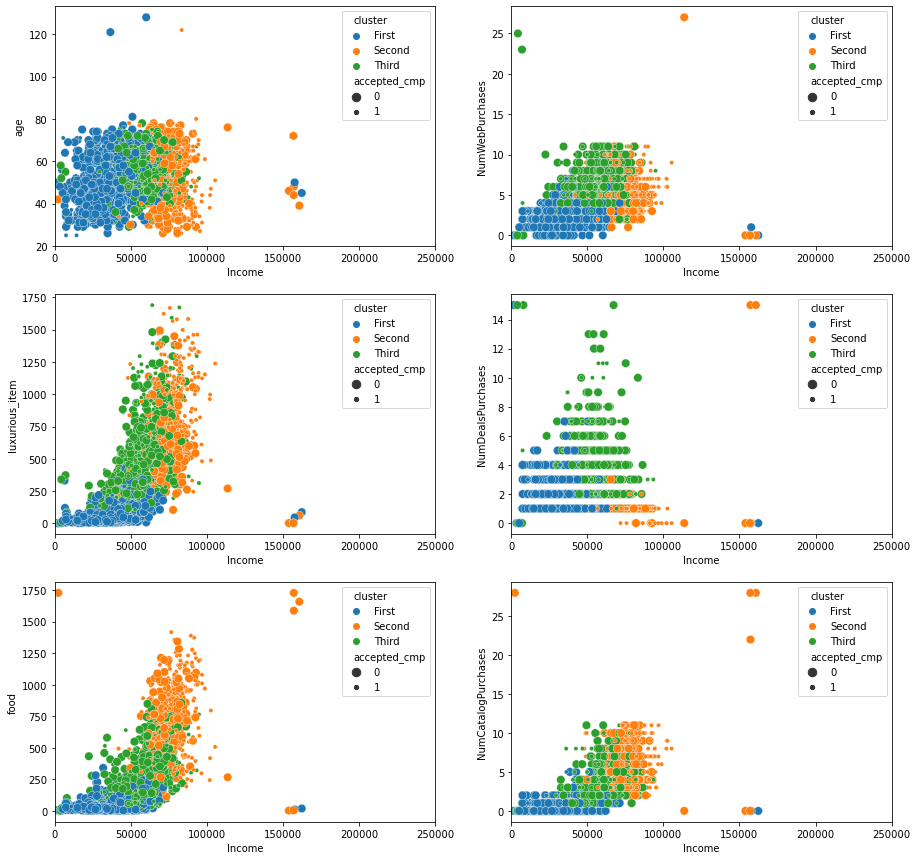

In [42]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(15,15))

for cols, x in zip(['age', 'luxurious_item', 'food', 'NumStorePurchases',], range(3)):
    for y in range(1):
        sns.scatterplot(x='Income',y=cols, data=scaled_data_pca_kmeans, hue='cluster', size='accepted_cmp' ,palette="tab10", ax=axs[x,y], hue_order=['First', 'Second','Third']).set(xlim=(0,250000))

for cols, x in zip(['NumWebPurchases','NumDealsPurchases','NumCatalogPurchases'], range(3)):
    for y in range(1,2):
        sns.scatterplot(x='Income',y=cols, data=scaled_data_pca_kmeans, hue='cluster', size='accepted_cmp' ,palette="tab10", ax=axs[x,y], hue_order=['First', 'Second','Third']).set(xlim=(0,250000))

My Observations for each clusters are as follows:

1.data points in the first cluster are closely associated whereas in second and third clusters they are sparsly arranged.

2.Almost 50 % age of data points are grouped as 1st cluster. However, observation points in second and third clusters are clubed approximately equally.

3.In terms of age feature allthe three clusters are simmilar having mean near to 50. Here you can see few potential outliers in first cluster.

4.Second cluster spent more on purchasing luxurious and food items. Infact this category dominates heavily follwed by third cluster. Box plot cleary dipicts hesistation of first cluster over spending on these products.

5.Third cluster is more interested in purchasing products on online platforms followed by second and first cluster.

6.Income of second cluster is higher than first and third category.

I would like to suggest the users to target customers belonging to second cluster as their income is higher. Also this group has high tendency to spend. One unique thing about this cluster is that it is not fond of visiting online platforms and make purchases. Therefore, good deals on web might attract them and hence increases the sale.

The user may bring good deals on online platforms for third cluster as well because this cluster is highly inclined towards online purchases. Also, one can view that spending money by this category on luxurious and food items is quite impressive.